<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Titanic-Data-Analysis-using-E3tools" data-toc-modified-id="Titanic-Data-Analysis-using-E3tools-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Titanic Data Analysis using E3tools</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Column-Description" data-toc-modified-id="Column-Description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Column Description</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation Analysis</a></span></li><li><span><a href="#Column-Drill-down" data-toc-modified-id="Column-Drill-down-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Column Drill-down</a></span></li><li><span><a href="#Aggregate-Statistics" data-toc-modified-id="Aggregate-Statistics-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Aggregate Statistics</a></span></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Train-&amp;-Test" data-toc-modified-id="Train-&amp;-Test-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train &amp; Test</a></span></li><li><span><a href="#Model-Diagnosis" data-toc-modified-id="Model-Diagnosis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model Diagnosis</a></span></li></ul></li></ul></div>

# Titanic Data Analysis using E3tools 

In [1]:
import os
import sys
import time
import json
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%precision 3
%matplotlib inline

In [2]:
import e3tools.eda_table as et
import e3tools.ml_bench as mb
import e3tools.eda_display_utils as edu
import e3tools.eda_display_js_utils as edju
from importlib import reload

## Load Data

In [3]:
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [4]:
titanic['survived'] = titanic['survived'].replace({0:"Died", 1:"Survived"})

In [5]:
eb = et.EDATable(titanic)

## Column Description

In [6]:
eb.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,Died,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,Survived,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,Survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,Survived,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,Died,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,Died,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,Died,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,Died,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,Survived,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,Survived,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [7]:
eb.colinfo()

Total: 891 rows


,DataType,ValueCount,NullCount,ZeroCount,0,1,2
survived,object,2,0,0,Died,Survived,Survived
pclass,int64,3,0,0,3,1,3
sex,object,2,0,0,male,female,female
age,float64,88,177,0,22,38,26
sibsp,int64,7,0,608,1,1,0
parch,int64,7,0,678,0,0,0
fare,float64,248,0,15,7.25,71.2833,7.925
embarked,object,3,2,0,S,C,S
class,object,3,0,0,Third,First,Third
who,object,3,0,0,man,woman,woman


In [8]:
eb.desc()

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be u

<Figure size 360x360 with 0 Axes>

In [9]:
eb.desc_detail(['fare', 'class', 'pclass', 'sex', 'survived'], figsize=(6,4));

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be used together with FixedLocator

/Users/jinkim/dev/e3tools/e3tools/eda_table.py:307: UserWarning:

FixedFormatter should only be used together with FixedLocator



,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
10%,7.550000
25%,7.910400
50%,14.454200
75%,31.000000
90%,77.958300
max,512.329200


<Figure size 432x288 with 0 Axes>

## Correlation Analysis

In [10]:
eb.corr()

,pclass,age,sibsp,parch,fare,adult_male,alone
pclass,1.000000,-0.362000,-0.043000,-0.023000,-0.688000,0.099000,0.136000
age,-0.362000,1.000000,-0.182000,-0.254000,0.135000,0.258000,0.167000
sibsp,-0.043000,-0.182000,1.000000,0.450000,0.447000,-0.308000,-0.828000
parch,-0.023000,-0.254000,0.450000,1.000000,0.410000,-0.397000,-0.684000
fare,-0.688000,0.135000,0.447000,0.410000,1.000000,-0.309000,-0.531000
adult_male,0.099000,0.258000,-0.308000,-0.397000,-0.309000,1.000000,0.405000
alone,0.136000,0.167000,-0.828000,-0.684000,-0.531000,0.405000,1.000000


,age,sibsp,parch,fare,adult_male,alone
fare,0.135051,0.447113,0.410074,1.0,-0.308894,-0.531472


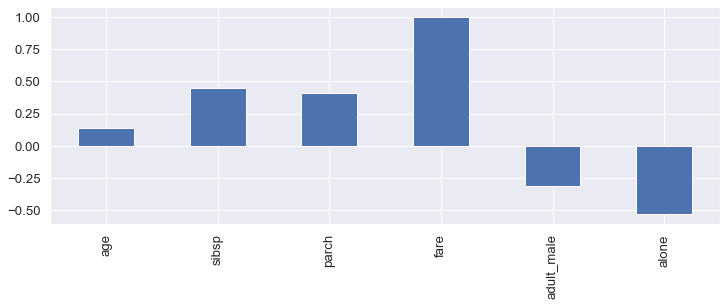

In [12]:
eb.corr_with('fare')

In [13]:
eb.pairplot(['pclass','fare','age'])

<Figure size 360x360 with 0 Axes>

## Aggregate Statistics

In [15]:
FACETS = ['who', 'class', 'survived']
METRICS = ['fare', 'age']
ea = edu.agg_dataframe(titanic, FACETS, METRICS)
ea

,who,class,survived,sample_size,fare_avg,fare_sum,fare_ssq,fare_ci95,age_avg,age_sum,age_ssq,age_ci95
0,child,First,Died,1.0,151.550000,151.5500,2.296740e+04,NaN,2.000000,2.00,4.0000,NaN
1,child,First,Survived,5.0,136.949160,684.7458,1.031317e+05,42.392260,8.984000,44.92,558.8464,5.461325
2,child,Second,Survived,19.0,28.323905,538.1542,1.632377e+04,3.484785,4.543684,86.33,673.8267,1.778396
3,child,Third,Died,33.0,29.030179,957.9959,3.159641e+04,3.710944,7.378788,243.50,2417.2500,1.502423
4,child,Third,Survived,25.0,15.551004,388.7751,7.038297e+03,2.520737,6.076800,151.92,1547.3014,1.998961
5,man,First,Died,77.0,62.894910,4842.9081,5.786737e+05,13.413254,44.581967,2719.50,133782.2500,4.976969
6,man,First,Survived,42.0,71.554074,3005.2711,6.562763e+05,31.373821,38.756757,1434.00,61120.0000,5.208144
7,man,Second,Died,91.0,19.488965,1773.4958,5.680580e+04,3.229945,33.369048,2803.00,105802.5000,3.021492
8,man,Second,Survived,8.0,14.107812,112.8625,1.764669e+03,3.439184,36.666667,220.00,9110.0000,14.488212
9,man,Third,Died,281.0,10.793369,3032.9366,5.790309e+04,1.108500,29.209184,5725.00,189891.0000,1.891146


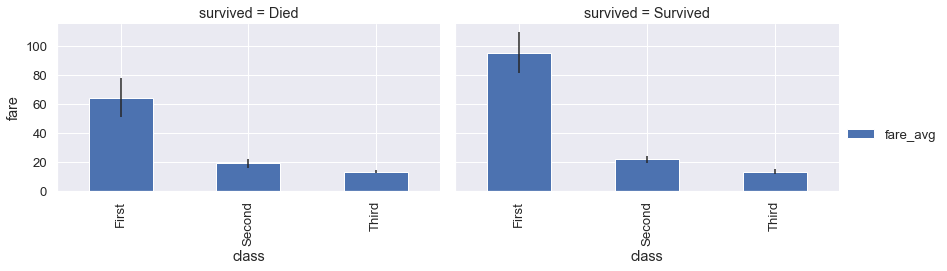

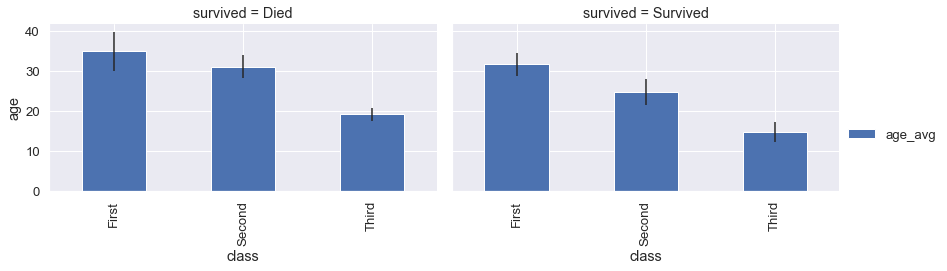

In [16]:
for m in METRICS:
    g = sns.FacetGrid(ea, col='survived', height=4, aspect=1.5)
    g.map_dataframe(edu.plot_facet_measure, "class", m, kind='bar', subplots=True)
    g.add_legend()

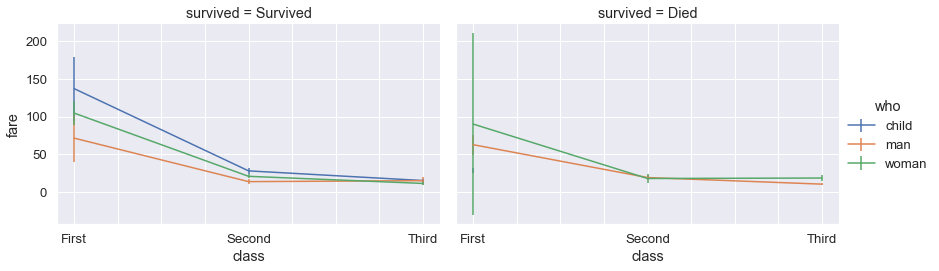

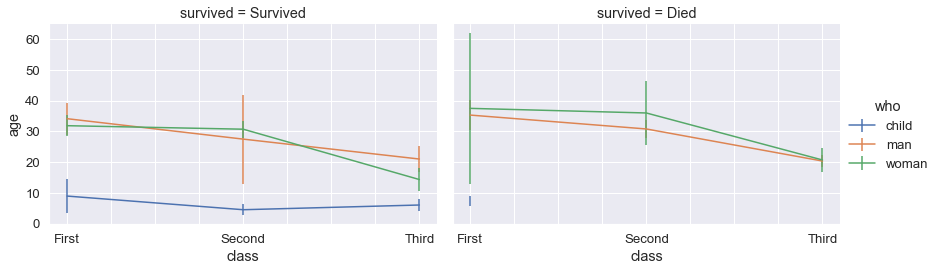

In [17]:
for m in METRICS:
    g = sns.FacetGrid(ea.dropna(), col='survived', hue='who', height=4, aspect=1.5)
    g.map_dataframe(edu.plot_facet_measure, "class", m, kind='line', verbose=False)
    g.add_legend()

# Classification

## Data Preparation

In [18]:
reload(mb)
titanic['survived_yn'] = titanic['survived'].apply(lambda e: True if e == 'Survived' else False )
titanic_final = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'deck'], axis=1)
titanic_final.to_csv("titanic_final.csv")
mt = mb.MLTable(titanic_final, c_label="survived_yn")

Task type: classification-binary


In [19]:
mt.dtypes

{'pclass': 'int64',
 'sex': 'object',
 'age': 'float64',
 'sibsp': 'int64',
 'parch': 'int64',
 'fare': 'float64',
 'embarked': 'object',
 'class': 'object',
 'who': 'object',
 'alone': 'object',
 'survived_yn': 'object',
 'rowtype': 'object'}

In [20]:
mt.colinfo()

Total: 891 rows


,DataType,ValueCount,NullCount,ZeroCount,0,1,2
pclass,int64,3,0,0,3,1,3
sex,object,2,0,0,male,female,female
age,float64,88,177,0,22,38,26
sibsp,int64,7,0,608,1,1,0
parch,int64,7,0,678,0,0,0
fare,float64,248,0,15,7.25,71.2833,7.925
embarked,object,3,2,0,S,C,S
class,object,3,0,0,Third,First,Third
who,object,3,0,0,man,woman,woman
alone,object,2,0,354,False,False,True


In [21]:
mt.preprocess().head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived_yn,rowtype
0,0.827377,male,-0.530377,0.432793,-0.473674,-0.502445,S,Third,man,False,False,dev
1,-1.566107,female,0.571831,0.432793,-0.473674,0.786845,C,First,woman,False,True,dev
2,0.827377,female,-0.254825,-0.474545,-0.473674,-0.488854,S,Third,woman,True,True,dev
3,-1.566107,female,0.365167,0.432793,-0.473674,0.420730,S,First,woman,False,True,dev
4,0.827377,male,0.365167,-0.474545,-0.473674,-0.486337,S,Third,man,True,False,dev


In [22]:
mt.encode();

Using normalized table...
Omitting constant: rowtype
Encoded DF Shape: (891, 20)


In [23]:
mt.split()

Dev Shape: (891, 19)
Train Shape: (712, 19)
Test Shape: (179, 19)


## Train & Test

In [24]:
mlb = mb.MLBench()

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

mlb.add_table(mt)
mlb.add_model(mb.MLModel("RF_10", RandomForestClassifier(n_estimators=10)))
mlb.add_model(mb.MLModel("RF_100", RandomForestClassifier(n_estimators=100)))
mlb.add_model(mb.MLModel("LR", LogisticRegression(solver='liblinear')))

In [25]:
mlb.train_batch()

Confusion Matrix: 
 [[86 11]
 [22 60]]
Confusion Matrix: 
 [[85 12]
 [21 61]]
Confusion Matrix: 
 [[86 11]
 [20 62]]


,tbl_name,raw_features,encoded_features,train_set,test_set,model_name,accuracy,roc_auc,log_loss,type1_error,type2_error
0,Default,12,20,712,179,RF_10,0.815642,0.864596,1.322158,0.113402,0.268293
1,Default,12,20,712,179,RF_100,0.815642,0.873020,1.146552,0.123711,0.256098
2,Default,12,20,712,179,LR,0.826816,0.885404,0.414562,0.113402,0.243902


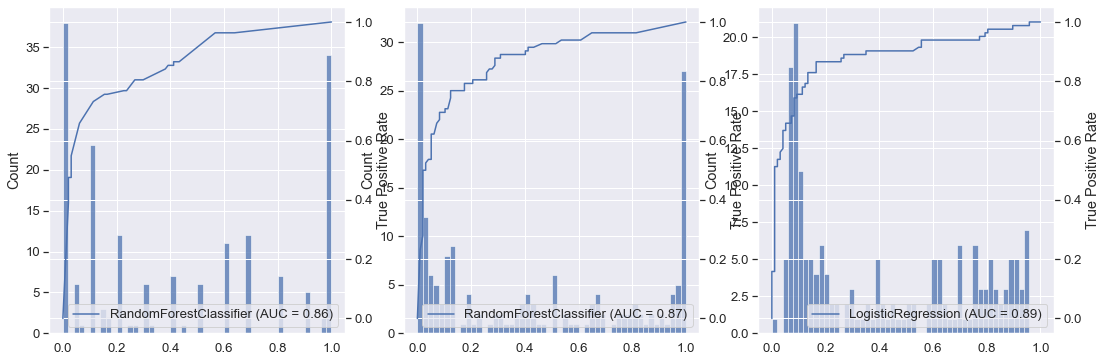

In [26]:
mlb.evaluate_batch(verbose=True)

## Model Diagnosis

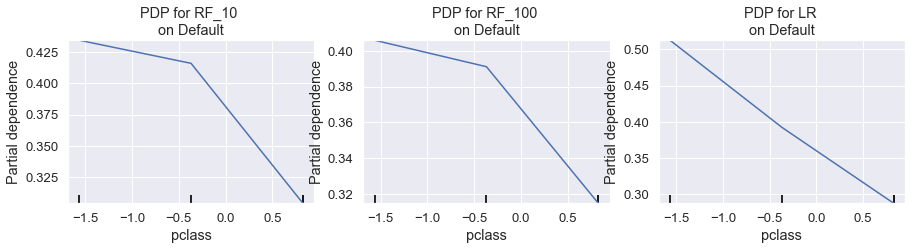

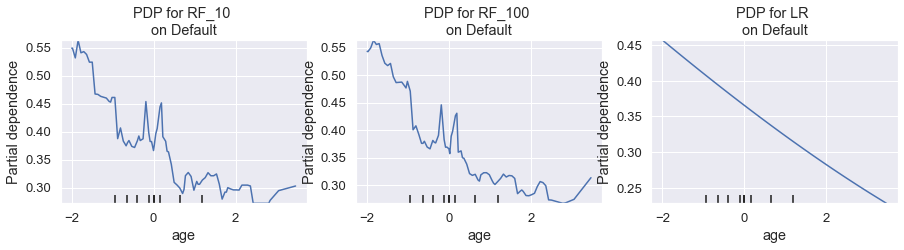

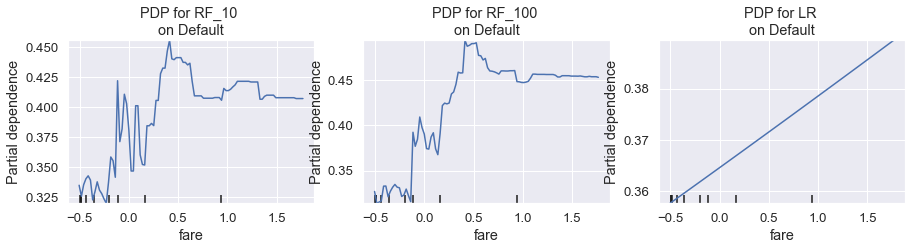

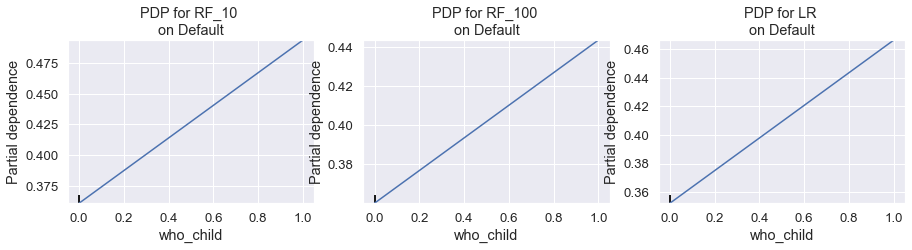

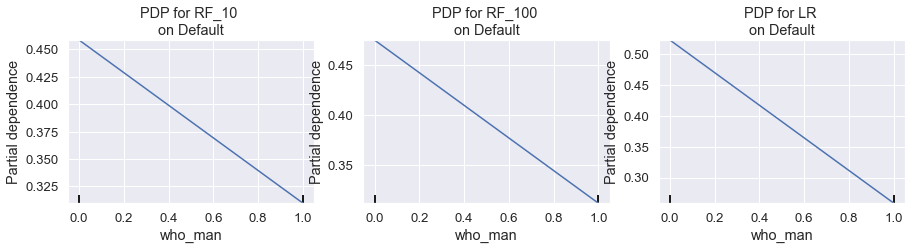

In [27]:
mlb.plot_partial_dependence(set(['pclass', 'age', 'fare', 'who_man', 'who_child']))

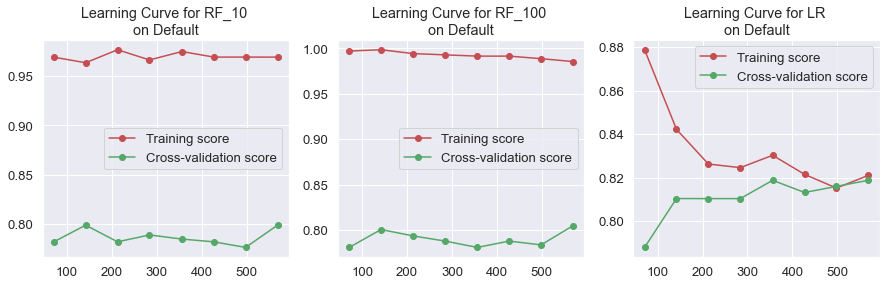

In [28]:
mlb.plot_learning_curve()

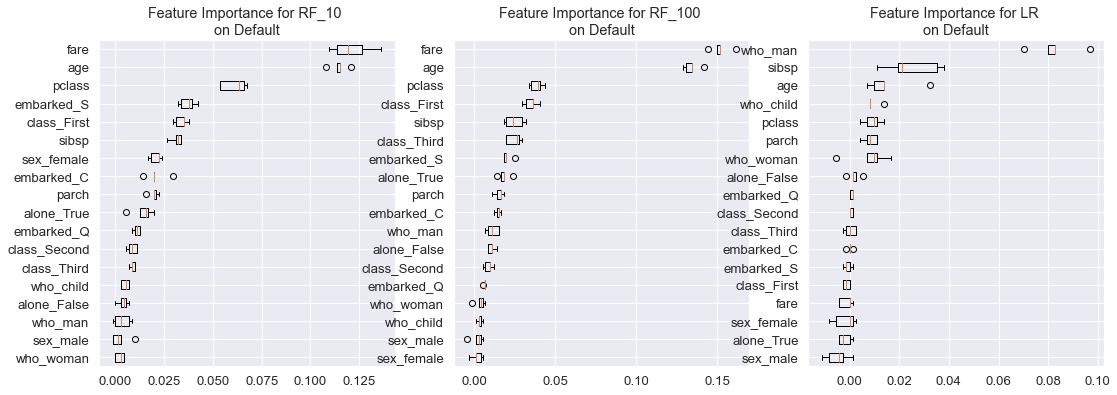

In [29]:
mlb.plot_feature_importance()